# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Nisrina Nurkhomsatun Purnomo
- **Email:** m010d4kx2032@bangkit.academy
- **ID Dicoding:** nisrinapurnomogpc2

## Menentukan Pertanyaan Bisnis

1. Do holiday, weekday, dan workingday affect the frequency of the bike user?
2. How does weather affect the use of bikes?

## Import Semua Packages/Library yang Digunakan

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import calendar
from pathlib import Path

## Data Wrangling

### Gathering Data

Gather the Day data that has been uploaded to my GitHub

In [94]:
day_df = pd.read_csv("https://raw.githubusercontent.com/asouoz/bike-sharing/main/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Gather the Hour data that has been uploaded to my GitHub

In [95]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/asouoz/bike-sharing/main/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

day_df Data

Check the data type of the day_df

In [96]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Based on the output above, there is one data type of a column that needs fixing. Column dteday is supposed to have datetime data type.

Check for the missing values and sum it up

In [97]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no missing values from the output above.

Check if there is any duplicate data

In [98]:
print("The amount of duplicated data: ", day_df.duplicated().sum())

The amount of duplicated data:  0


There are zero duplicated data, which means every data is different.

Check for anomaly in the statistic data

In [99]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


No anomaly based on the output above.

hour_df

Check hour_df data for any abnormality

In [100]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


There is one data type that does not match the column. dteday column should have datetime data type.

Check if there are missing values

In [101]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

No missing values from the output above.

Check if there is any duplicated data

In [102]:
print("The amount of duplicated data: ", hour_df.duplicated().sum())

The amount of duplicated data:  0


No duplicated data from the output above. Every data is different.

Check abnormality from the statistics

In [103]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


There is no abnormality from the output above.

### Cleaning Data

Delete unnecessary column

There is no question that uses instant, windspeed, temp, atemp, and hum column

In [105]:
drop_col = ['instant', 'windspeed', 'temp', 'atemp', 'hum']

for i in day_df.columns:
  if i in drop_col:
    day_df.drop(labels=i, axis=1, inplace=True)

day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,82,1518,1600


Change the data type of dteday to datetime

In [107]:
day_df['dteday'] = pd.to_datetime(day_df.dteday)

Change the data type to category

In [108]:
day_df['season'] = day_df.season.astype('category')
day_df['yr'] = day_df.yr.astype('category')
day_df['mnth'] = day_df.mnth.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weathersit'] = day_df.weathersit.astype('category')
day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,82,1518,1600


Check the day_df data again

In [33]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   yr          731 non-null    category      
 3   mnth        731 non-null    category      
 4   holiday     731 non-null    category      
 5   weekday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weathersit  731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  casual      731 non-null    int64         
 12  registered  731 non-null    int64         
 13  cnt         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(3), int64(3)
memory usage: 46.5 KB


## Exploratory Data Analysis (EDA)

### Explore day_df Data


Bike user frequency based on the weather

In [112]:
day_df.groupby(by='weathersit').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                           
             max  min         mean      sum
weathersit                                 
1           8714  431  4876.786177  2257952
2           8362  605  4035.862348   996858
3           4639   22  1803.285714    37869

The output above shows that in a clear day, people tend to use the bike more rather than on rainy day. The number 1 is clear day, 2 cloudy day, and 3 is rainy day

Bike user frequency based on the holiday and non-holiday

In [111]:
day_df.groupby(by='holiday').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

The output above shows that people tend to use the bike on weekday or holiday. The number 0 is for holiday and 1 is for non-holiday

Bike user frequency based on days

In [113]:
day_df.groupby(by='weekday').agg({
    'cnt':['max','min','mean']
})

cnt                   
          max   min         mean
weekday                         
0        8227   605  4228.828571
1        7525    22  4338.123810
2        7767   683  4510.663462
3        8173   441  4548.538462
4        7804   431  4667.259615
5        8362  1167  4690.288462
6        8714   627  4550.542857

The frequency of the bike user is higher on 5 (Friday), followed by 4 (Thursday) and 6 (Saturday). The lowest is on 0 (Sunday). The number 0 is Sunday, 1 is Monday, and so on until 6 as Saturday.

Based on working day and non-workingday

In [115]:
day_df.groupby(by='workingday').agg({
    'cnt': ['max', 'min', 'mean']
})

cnt                  
             max  min         mean
workingday                        
0           8714  605  4330.168831
1           8362   22  4584.820000

the output above shows that the frequency of the bike user is higher on workingday than non-workingday. The number 0 is non-workingday and 1 is workingday

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah holiday, weekday, dan workingday memengaruhi frekuensi peminjaman sepeda?

<ipython-input-126-56257a9eea4d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-126-56257a9eea4d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-126-56257a9eea4d>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


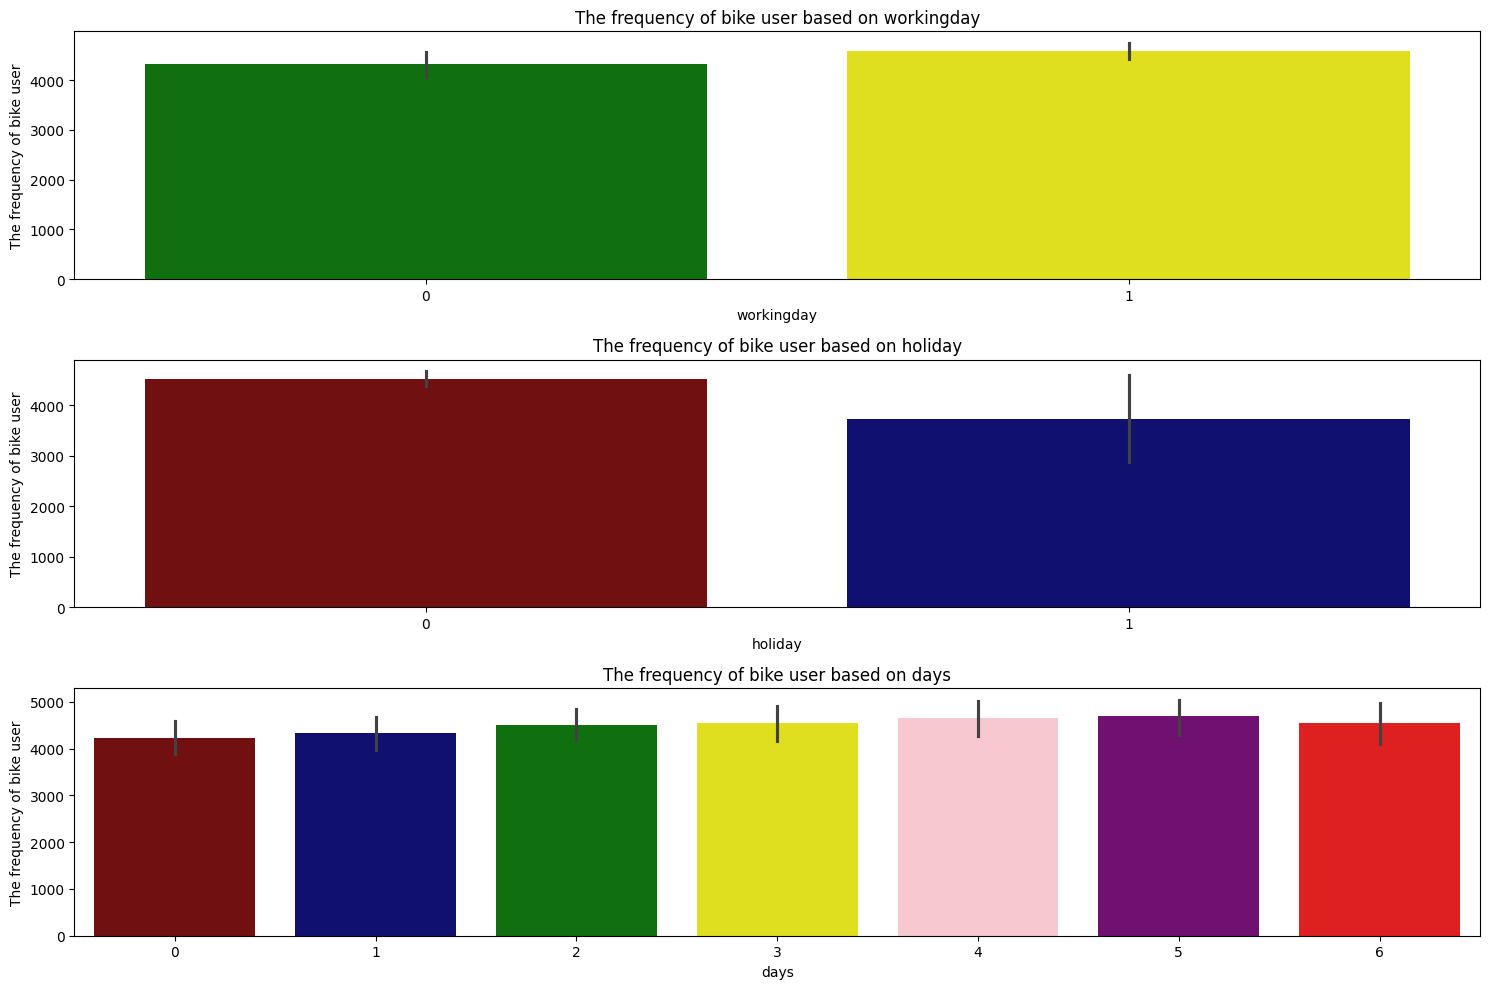

In [126]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,10))

sns.barplot(
    x='workingday',
    y='cnt',
    data=day_df,
    ax=axes[0],
    palette=['green', 'yellow'])
axes[0].set_title('The frequency of bike user based on workingday')
axes[0].set_xlabel('workingday')
axes[0].set_ylabel('The frequency of bike user')


sns.barplot(
  x='holiday',
  y='cnt',
  data=day_df,
  ax=axes[1],
  palette=['maroon', 'navy'])
axes[1].set_title('The frequency of bike user based on holiday')
axes[1].set_xlabel('holiday')
axes[1].set_ylabel('The frequency of bike user')


sns.barplot(
  x='weekday',
  y='cnt',
  data=day_df,
  ax=axes[2],
  palette=['maroon', 'navy', 'green', 'yellow', 'pink', 'purple', 'red'])
axes[2].set_title('The frequency of bike user based on days')
axes[2].set_xlabel('days')
axes[2].set_ylabel('The frequency of bike user')

plt.tight_layout()
plt.show()


### Pertanyaan 2: Bagaimana pengaruh cuaca terhadap penggunaan sepeda?

<ipython-input-127-b6450ee458e6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


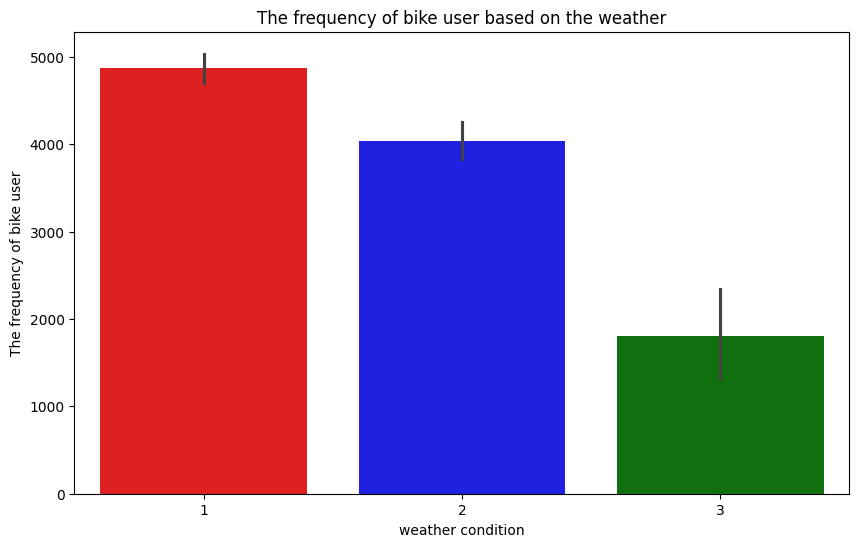

In [127]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='weathersit',
    y='cnt',
    data=day_df,
    palette=['red', 'blue', 'green'])

plt.title('The frequency of bike user based on the weather')
plt.xlabel('weather condition')
plt.ylabel('The frequency of bike user')
plt.show()

## Conclusion

- Conclusion for question 1:
Question number one is divided by three parts: holiday vs non-holiday, seven days, and workingday vs non-workingday.
Based on the average value of bike user frequency based on the holiday vs non-holiday, people tend to use bikes when it is holiday with the value of 4527,1. On the second part, the calculation use seven days of the week. From the output given, the frequency of the bike user is higher on Friday with 4690,29, followed by Thursday and Saturday. The lowest average value is on Sunday with 4228,83. The last part between workingday and non-working day, people are more likely to use bikes on workingday rather than non-workingday. The difference is not too significant as the average on workingday is 4584,82 while non-workingday is 4330,17.
From the outputs, it is shown that holiday, workingday, and weekday affect the frequency of the bike user.

- Conclusion for question 2:
Based on the output above, it is shown that the frequency of the bike user is higher on a clear weather. The average value of the bike user on a clear day is 4876,77, on a cloudy day is 4035,86, and on a rainy day is 1803,23.

In [183]:
day_df.to_csv("main_data.csv", index=False)